<ipython-input-11-a505b6ee173c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('Unknown', inplace=True)
<ipython-input-11-a505b6ee173c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Statistical Summary:
                  count          mean           std          min        25%  \
release_year     5850.0   2016.417094      6.937726  1945.000000  2016.0000   
runtime          5850.0     76.888889     39.002509     0.000000    44.0000   
seasons          5850.0      0.778632      1.918422     0.000000     0.0000   
imdb_score       5368.0      6.510861      1.163826     1.500000     5.8000   
imdb_votes       5352.0  23439.382474  95820.470909     5.000000   516.7500   
tmdb_popularity  5759.0     22.637925     81.680263     0.009442     2.7285   
tmdb_score       5539.0      6.829175      1.170391     0.500000     6.1000   

                      50%        75%          max  Skewness    Kurtosis  
release_year     2018.000  2020.0000     2022.000 -3.572176   18.038072  
runtime            83.000   104.0000      240.000  0.204589   -0.566809  
seasons             0.000     1.0000       42.000  8.562315  126.807901  
imdb_score          6.600     7.3000        9.600 

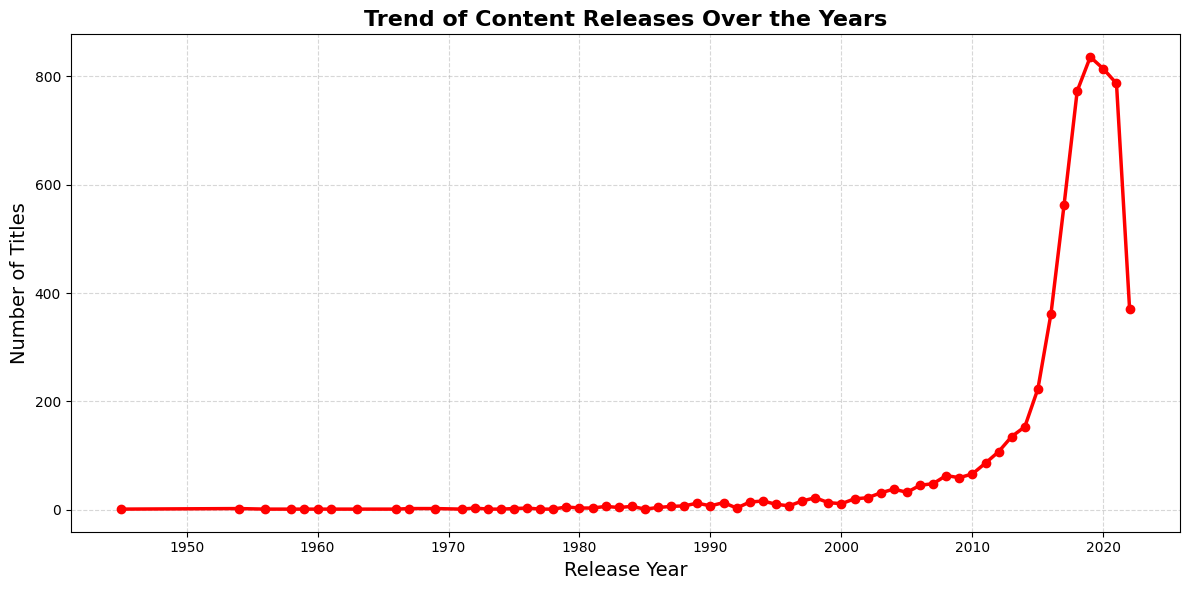

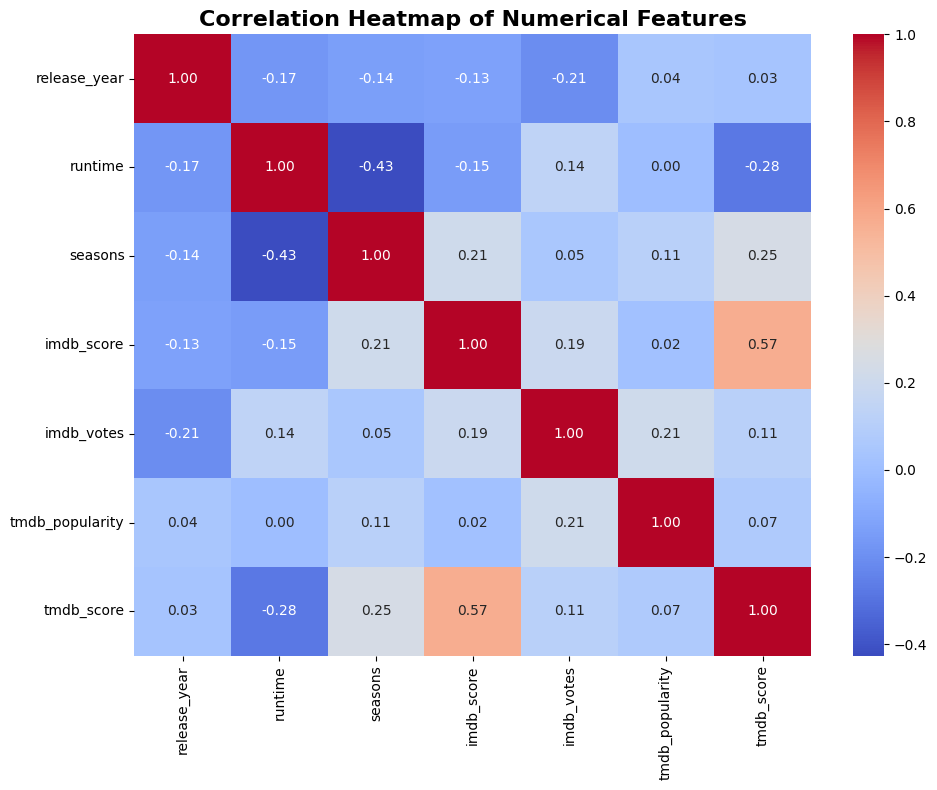

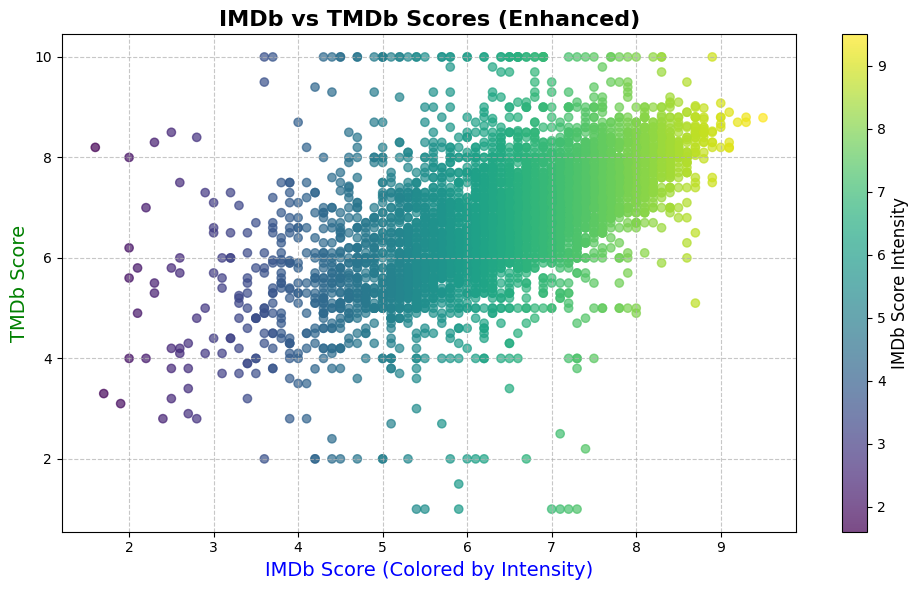

<ipython-input-11-a505b6ee173c>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='title', y='imdb_score', palette='viridis')


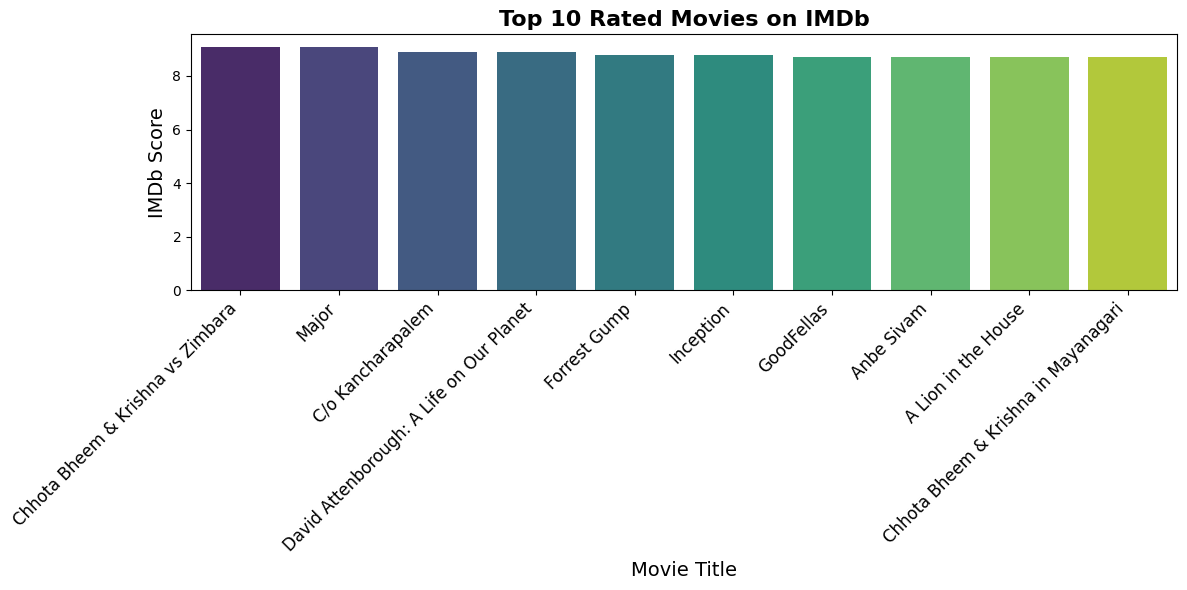

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


def load_and_clean_data(file_path):
    """
    Load and clean Netflix dataset.
    Args:
        file_path (str): Path to the dataset.
    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    df = pd.read_csv('/content/netflix_data/titles.csv')

    # Handle missing values
    df['title'].fillna('Unknown', inplace=True)
    df['description'].fillna('No description available.', inplace=True)
    df['age_certification'].fillna('Unknown', inplace=True)
    df['seasons'].fillna(0, inplace=True)
    df['genres'] = df['genres'].apply(eval)

    # Convert genre column to list
    return df


def plot_release_year_trend(df):
    """
    Plot the trend of content releases over the years.
    Args:
        df (pd.DataFrame): DataFrame containing release year data.
    """
    plt.figure(figsize=(12, 6))
    df['release_year'].value_counts().sort_index().plot(kind='line', color='red', marker='o', linewidth=2.5)
    plt.title('Trend of Content Releases Over the Years', fontsize=16, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel('Number of Titles', fontsize=14)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()


def create_correlation_heatmap(df):
    """
    Create a correlation heatmap of numerical features.
    Args:
        df (pd.DataFrame): DataFrame containing numerical columns.
    """
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


def plot_imdb_vs_tmdb_score(df):
    """
    Scatter plot comparing IMDb scores with TMDb scores.
    Args:
        df (pd.DataFrame): DataFrame containing IMDb and TMDb scores.
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['imdb_score'], df['tmdb_score'], c=df['imdb_score'], cmap='viridis', alpha=0.7)
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('IMDb Score Intensity', fontsize=12)

    plt.title('IMDb vs TMDb Scores (Enhanced)', fontsize=16, fontweight='bold')
    plt.xlabel('IMDb Score (Colored by Intensity)', fontsize=14, color='blue')
    plt.ylabel('TMDb Score', fontsize=14, color='green')

    plt.grid(alpha=0.7, linestyle='--')
    plt.tight_layout()
    plt.show()


def calculate_statistical_summary(df):
    """
    Generate a statistical summary of numerical features, including skewness and kurtosis.
    Args:
        df (pd.DataFrame): DataFrame containing numerical columns.
    Returns:
        pd.DataFrame: Statistical summary DataFrame.
    """
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = df[numerical_cols].describe().T
    summary['Skewness'] = df[numerical_cols].apply(skew)
    summary['Kurtosis'] = df[numerical_cols].apply(kurtosis)
    return summary


def plot_top_rated_movies(df, n=10):
    """
    Bar plot showing the top N rated movies based on IMDb score.
    Args:
        df (pd.DataFrame): DataFrame containing IMDb scores.
        n (int): Number of top-rated movies to display.
    """
    top_movies = df[df['type'] == 'MOVIE'].nlargest(n, 'imdb_score')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_movies, x='title', y='imdb_score', palette='viridis')
    plt.title(f'Top {n} Rated Movies on IMDb', fontsize=16, fontweight='bold')
    plt.xlabel('Movie Title', fontsize=14)
    plt.ylabel('IMDb Score', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()


def main():
    """
    Main function to execute all tasks in sequence.
    """
    # Load and clean the dataset
    file_path = 'titles.csv'  # Update with your actual path
    df = load_and_clean_data(file_path)

    # Generate statistical summary
    print("Statistical Summary:")
    summary = calculate_statistical_summary(df)
    print(summary)

    # Generate plots
    plot_release_year_trend(df)
    create_correlation_heatmap(df)
    plot_imdb_vs_tmdb_score(df)
    plot_top_rated_movies(df, n=10)


if __name__ == "__main__":
    main()
